In [12]:
import os 
import glob
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from scipy.signal import resample
from pathlib import Path
from tqdm import tqdm

import wfdb

# PTB-XL

In [ ]:
path = "C:/Users/cleme/ETH/Master/Thesis/data/PTB/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/00002_lr"
record = wfdb.rdrecord(path)
record.p_signal.shape

(1000, 12)

In [121]:
summary = pd.read_csv("C:/Users/cleme/ETH/Master/Thesis/data/PTB/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv")
print(summary.columns)
summary[["strat_fold", "ecg_id", "filename_lr"]]

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')


,strat_fold,ecg_id,filename_lr
0,3,1,records100/00000/00001_lr
1,2,2,records100/00000/00002_lr
2,5,3,records100/00000/00003_lr
3,3,4,records100/00000/00004_lr
4,4,5,records100/00000/00005_lr
...,...,...,...
21794,7,21833,records100/21000/21833_lr
21795,4,21834,records100/21000/21834_lr
21796,2,21835,records100/21000/21835_lr
21797,8,21836,records100/21000/21836_lr


In [122]:
path = Path("C:/Users/cleme/ETH/Master/Thesis/data/PTB/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/")
data = np.load(path / "ptbxl_preprocessed.npz")
keys = list(data.keys())
arr = []
for key in keys:
    arr.append(np.expand_dims(data[key], axis=0))
stacked = np.concatenate(arr, axis=0)
print(stacked.shape)
np.save(path / "ptbxl.npy", stacked)

(21799, 1000, 12)


# mhc_6mwt_dataset

In [13]:
path = "C:/Users/cleme/ETH/Master/Thesis/data/mhc_6mwt_dataset"
df = pd.read_parquet(path + "/hr_walk.parquet")
df.head(1)

,startDate,value,endDate,type,unit,source,recordId,table_version,metadata.HKMetadataKeyHeartRateMotionContext,metadata.HKDeviceName
0,2015-07-20T22:40:04-0500,82.0,2015-07-20T22:40:04-0500,HKQuantityTypeIdentifierHeartRate,count/min,b128da5c6542bf69de81ddb92e0778318deac8fc5510a1...,a74d2ef1-009a-4b0f-ae38-162b171464f4,1,NaN,None


In [14]:
with open(path + "/mhc6mwt.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")


In [17]:
data

[{'a74d2ef1-009a-4b0f-ae38-162b171464f4': array([[ 82.        ,   2.2       ,   1.96479856],
         [ 82.        ,   2.2       ,   1.96479856],
         [ 82.        ,   2.2       ,   1.96479856],
         [ 87.        ,   2.2       ,   1.96479856],
         [ 96.        ,   2.2       ,   1.96479856],
         [ 96.        ,   2.5       ,   1.66436396],
         [ 95.        ,   2.5       ,   1.66436396],
         [ 95.        ,   1.33333333,   0.86490024],
         [ 92.        ,   1.33333333,   0.86490024],
         [ 92.        ,   1.33333333,   0.86490024],
         [ 90.        ,   1.5       ,   1.00568471],
         [ 91.        ,   1.5       ,   1.00568471],
         [ 91.        ,   1.        ,   0.72203005],
         [ 91.        ,   1.        ,   0.72203005],
         [ 90.        ,   1.        ,   0.72203005],
         [ 90.        ,   2.        ,   1.38270236],
         [ 90.        ,   2.        ,   1.38270236],
         [ 89.        ,   2.        ,   1.30680413],
      

In [6]:
df_rest = pd.read_parquet(path + "/hr_rest.parquet")
df_rest.head(1)

,startDate,value,endDate,type,unit,source,recordId,table_version,metadata.HKMetadataKeyHeartRateMotionContext,metadata.HKDeviceName
0,2015-03-27T11:51:07-0400,96.0,2015-03-27T11:51:07-0400,HKQuantityTypeIdentifierHeartRate,count/min,b0d757c861387930420785c7450f4a8550be0d8dd73247...,12573e86-66a7-4ffe-a66b-638e050bfd9f,1,NaN,None


In [7]:
df_pedometer = pd.read_parquet(path + "/pedometer.parquet")
df_pedometer.head(1)

,floorsAscended,floorsDescended,endDate,startDate,numberOfSteps,distance,recordId,table_version
0,0.0,0.0,2015-04-01 18:59:03-05:00,2015-04-01 18:59:01-05:00,5,3.25,a324c21a-1bb3-45eb-9f0c-29d0173f4497,1


In [8]:
df_summary = pd.read_parquet(path + "/summary_table.parquet")
print(list(df_summary.columns))
df_summary.head(1)

['6mwt_endtime', '6mwt_startime', '6mwt_total_distance', '6mwt_total_steps', 'age', 'appVersion', 'createdOn', 'createdOnTimeZone', 'dayInStudy', 'deviceRegion', 'distances_at_n_seconds', 'healthCode', 'hr_at_n_seconds', 'hr_unit', 'phoneInfo', 'recordId', 'rest_hr_mean', 'rest_hr_unit', 'steps_at_n_seconds', 'uploadDate', 'walk_hr_mean', 'family_history', 'medications_to_treat', 'userSharingScope', 'ethnicity', 'race', 'education', 'Stroke', 'Transient_Ischemic_Attack', 'Carotid_Artery_Blockage_Stenosis', 'Carotid_Artery_Surgery_or_Stent', 'Peripheral_Vascular_Disease', 'Abdominal_Aortic_Aneurysm', 'Pulmonary_Arterial_Hypertension', 'No_Vascular_Disease', 'Heart_Attack_Myocardial_Infarction', 'Heart_Bypass_Surgery', 'Coronary_Blockage_Stenosis', 'Coronary_Stent_Angioplasty', 'Angina_Heart_Chest_Pains', 'High_Coronary_Calcium_Score', 'Heart_Failure_or_CHF', 'Atrial_Fibrillation_Afib', 'Congenital_Heart_Defect', 'Pulmonary_Hypertension', 'No_Cardiovascular_Disease', 'unhealthy', 'weight

,6mwt_endtime,6mwt_startime,6mwt_total_distance,6mwt_total_steps,age,appVersion,createdOn,createdOnTimeZone,dayInStudy,deviceRegion,...,BiologicalSex,WakeUpTime,CurrentAge,GoSleepTime,HeightCentimeters,WeightKilograms,BloodType,FitzpatrickSkinType,bmi,zip_name
0,2015-03-16 01:08:47-05:00,2015-03-16 01:02:47-05:00,780.44,664.0,40.0,"version 1.0, build 5.1",2015-03-16 06:11:48,None,NaN,US,...,Male,2017-12-07 19:00:00-07:00,43.0,2017-12-07 14:30:00-07:00,177.8,104.32616,None,None,33.001198,other


In [10]:
df = df[~df["startDate"].str.startswith("65535")]
m1 = df[["startDate", "value","recordId"]]
m2 = df_pedometer[["startDate", "endDate","numberOfSteps","recordId"]]

m1["startDate"] = (pd.to_datetime(m1["startDate"], utc=True)).dt.tz_localize(None).astype("datetime64[ns]")
m2["startDate"] = pd.to_datetime(m2["startDate"], utc=True).dt.tz_localize(None).astype("datetime64[ns]")
m2["endDate"]   = pd.to_datetime(m2["endDate"], utc=True).dt.tz_localize(None).astype("datetime64[ns]")

m1 =m1.sort_values(["startDate"])
m2= m2.sort_values(["endDate"])

print(m1.info())
print(m2.info())

print(m1.columns)
print(m2.columns)

merged = pd.merge(m1, m2, on="recordId")


C:\Users\cleme\AppData\Local\Temp\ipykernel_17768\4114057917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1["startDate"] = (pd.to_datetime(m1["startDate"], utc=True)).dt.tz_localize(None).astype("datetime64[ns]")
C:\Users\cleme\AppData\Local\Temp\ipykernel_17768\4114057917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2["startDate"] = pd.to_datetime(m2["startDate"], utc=True).dt.tz_localize(None).astype("datetime64[ns]")
C:\Users\cleme\AppData\Local\Temp\ipykernel_17768\4114057917.py:7: Setti

<class 'pandas.core.frame.DataFrame'>
Index: 116150 entries, 1 to 7
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   startDate  116150 non-null  datetime64[ns]
 1   value      116150 non-null  float64       
 2   recordId   116150 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2593578 entries, 0 to 139
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   startDate      datetime64[ns]
 1   endDate        datetime64[ns]
 2   numberOfSteps  int64         
 3   recordId       object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 98.9+ MB
None
Index(['startDate', 'value', 'recordId'], dtype='object')
Index(['startDate', 'endDate', 'numberOfSteps', 'recordId'], dtype='object')


In [11]:
merged[merged["recordId"] == "cecb92e9-550d-4886-ba5f-c3267e5205b1"]

,startDate_x,value,recordId,startDate_y,endDate,numberOfSteps
6237373,2015-07-14 00:50:36,127.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:50:33,5
6237374,2015-07-14 00:50:36,127.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:50:35,9
6237375,2015-07-14 00:50:36,127.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:50:38,14
6237376,2015-07-14 00:50:36,127.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:50:40,19
6237377,2015-07-14 00:50:36,127.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:50:43,22
...,...,...,...,...,...,...
6244814,2015-07-14 00:54:46,158.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:56:22,606
6244815,2015-07-14 00:54:46,158.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:56:24,609
6244816,2015-07-14 00:54:46,158.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:56:27,613
6244817,2015-07-14 00:54:46,158.0,cecb92e9-550d-4886-ba5f-c3267e5205b1,2015-07-14 00:50:35,2015-07-14 00:56:29,617


In [ ]:
from tqdm import tqdm
for id in tqdm(df["recordId"].unique(),total=len(df["recordId"].unique())):
    hr_test = df[df["recordId"] == id][["value"]]
    acc_test = df_pedometer[df_pedometer["recordId"] == id]
    acc_test = acc_test.sort_values("endDate")
    acc_test = acc_test[["startDate", "endDate", "distance", "numberOfSteps"]]
    acc_test["seconds"] = (acc_test["endDate"] - acc_test["startDate"]).dt.total_seconds().astype(int)

    acc_test["delta_dist"] = acc_test["distance"].diff()
    acc_test["delta_steps"] = acc_test["numberOfSteps"].diff()
    acc_test["delta_sec"] = acc_test["seconds"].diff()

    acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
    acc_test["delta_steps"].iloc[0] = acc_test["numberOfSteps"].iloc[0]
    acc_test["delta_sec"].iloc[0] = acc_test["seconds"].iloc[0]

    acc_test["avg_steps"] = acc_test["delta_steps"] / acc_test["delta_sec"]
    acc_test["avg_dist"] = acc_test["delta_dist"] / acc_test["delta_sec"] 

    df_repeated = acc_test.loc[acc_test.index.repeat(acc_test["delta_sec"])].reset_index(drop=True)
    df_repeated = df_repeated[["avg_steps", "avg_dist"]]
    min_length = min(len(hr_test), len(df_repeated))
    df_concat = pd.concat((hr_test.iloc[:min_length, :], df_repeated.iloc[:min_length, :]), axis=1)
    print(df_concat.values)
     

  0%|          | 0/2060 [00:00<?, ?it/s]C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Lo

[[ 82.           2.2          1.96479856]
 [ 82.           2.2          1.96479856]
 [ 82.           2.2          1.96479856]
 [ 87.           2.2          1.96479856]
 [ 96.           2.2          1.96479856]
 [ 96.           2.5          1.66436396]
 [ 95.           2.5          1.66436396]
 [ 95.           1.33333333   0.86490024]
 [ 92.           1.33333333   0.86490024]
 [ 92.           1.33333333   0.86490024]
 [ 90.           1.5          1.00568471]
 [ 91.           1.5          1.00568471]
 [ 91.           1.           0.72203005]
 [ 91.           1.           0.72203005]
 [ 90.           1.           0.72203005]
 [ 90.           2.           1.38270236]
 [ 90.           2.           1.38270236]
 [ 89.           2.           1.30680413]
 [ 87.           2.           1.30680413]
 [ 86.           2.           1.30680413]
 [ 85.           2.           1.38270236]
 [ 86.           2.           1.38270236]
 [ 87.           1.66666667   1.14148554]
 [ 87.           1.66666667   1.14

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[ 98.           1.22222222   0.90555556]
 [ 98.           1.22222222   0.90555556]
 [ 98.           1.22222222   0.90555556]
 ...
 [139.           3.33333333   2.66666667]
 [139.           2.5          1.85      ]
 [140.           2.5          1.85      ]]


C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[107.           1.33333333   1.08038026]]


C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[103.           0.86666667   0.90680222]
 [104.           0.86666667   0.90680222]
 [104.           0.86666667   0.90680222]
 [103.           0.86666667   0.90680222]
 [103.           0.86666667   0.90680222]
 [104.           0.86666667   0.90680222]
 [103.           0.86666667   0.90680222]
 [108.           0.86666667   0.90680222]
 [110.           0.86666667   0.90680222]
 [113.           0.86666667   0.90680222]
 [115.           0.86666667   0.90680222]
 [115.           0.86666667   0.90680222]
 [115.           0.86666667   0.90680222]
 [115.           0.86666667   0.90680222]
 [114.           0.86666667   0.90680222]
 [115.           3.           3.16379837]
 [116.           3.           3.16379837]
 [116.           0.66666667   0.49049222]
 [116.           0.66666667   0.49049222]
 [115.           0.66666667   0.49049222]
 [115.           2.5          2.76999224]
 [115.           2.5          2.76999224]
 [115.           1.66666667   2.15814657]
 [115.           1.66666667   2.15

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[105.           1.25         1.14822539]
 [107.           1.25         1.14822539]
 [108.           1.25         1.14822539]
 [110.           1.25         1.14822539]
 [109.           1.25         1.14822539]
 [108.           1.25         1.14822539]
 [107.           1.25         1.14822539]
 [121.           1.25         1.14822539]
 [121.           1.66666667   1.82441256]
 [121.           1.66666667   1.82441256]
 [121.           1.66666667   1.82441256]
 [121.           2.           1.78911753]
 [121.           2.           1.78911753]
 [122.           1.66666667   1.49093126]
 [122.           1.66666667   1.49093126]
 [122.           1.66666667   1.49093126]
 [122.           2.           2.2964792 ]
 [122.           2.           2.2964792 ]
 [122.           1.33333333   1.15714069]
 [122.           1.33333333   1.15714069]
 [121.           1.33333333   1.15714069]
 [120.           3.           2.56351167]
 [121.           3.           2.56351167]
 [121.           1.66666667   2.18

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[127.           1.33333333   1.33853868]
 [127.           1.33333333   1.33853868]
 [127.           1.33333333   1.33853868]
 [127.           2.5          2.05469061]
 [127.           2.5          2.05469061]
 [127.           1.66666667   1.26256235]
 [127.           1.66666667   1.26256235]
 [126.           1.66666667   1.26256235]
 [126.           2.           1.67548204]
 [127.           2.           1.67548204]
 [128.           0.           0.90588367]
 [127.           0.           0.90588367]
 [127.           0.           0.90588367]
 [126.           4.5          1.41970215]
 [126.           4.5          1.41970215]
 [126.           1.33333333   0.74335703]]


C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[121.           1.66666667   1.24736462]
 [129.           1.66666667   1.24736462]
 [121.           1.66666667   1.24736462]
 [120.           2.           2.06529279]
 [117.           2.           2.06529279]
 [118.           1.66666667   1.60067661]
 [117.           1.66666667   1.60067661]
 [117.           1.66666667   1.60067661]
 [118.           2.5          2.37208703]
 [118.           2.5          2.37208703]
 [118.           1.66666667   1.58259984]
 [117.           1.66666667   1.58259984]
 [117.           1.66666667   1.58259984]
 [118.           2.5          2.42994281]
 [114.           2.5          2.42994281]
 [115.           1.33333333   1.40851386]
 [173.           1.33333333   1.40851386]
 [173.           1.33333333   1.40851386]
 [173.           2.5          2.51672648]
 [173.           2.5          2.51672648]
 [176.           1.66666667   1.67781765]
 [175.           1.66666667   1.67781765]
 [176.           1.66666667   1.67781765]
 [176.           1.66666667   1.69

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[191.           3.           1.83178099]
 [194.           3.           1.83178099]
 [198.           0.           0.30529683]
 [194.           0.           0.30529683]
 [194.           0.           0.30529683]
 [194.           0.           0.30529683]
 [194.           0.           0.30529683]
 [191.           0.           0.30529683]]


C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[ 95.           5.           3.61939641]
 [ 95.           2.           1.28477974]
 [101.           2.           1.28477974]
 [102.           2.           1.03449797]
 [101.           2.           1.03449797]
 [101.           2.           1.03449797]
 [101.           2.5          1.6476883 ]
 [ 98.           2.5          1.6476883 ]
 [ 98.           1.           0.6788917 ]
 [ 98.           1.           0.6788917 ]
 [ 99.           1.           0.6788917 ]
 [101.           3.5          2.38415563]
 [101.           3.5          2.38415563]
 [101.           0.66666667   0.59042774]
 [101.           0.66666667   0.59042774]
 [105.           0.66666667   0.59042774]
 [106.           1.66666667   1.06221416]
 [105.           1.66666667   1.06221416]
 [105.           1.66666667   1.06221416]
 [105.           0.           1.59332125]
 [105.           0.           1.59332125]
 [105.           2.66666667   2.33945234]
 [105.           2.66666667   2.33945234]
 [105.           2.66666667   2.33

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[1.11000000e+02 1.57142857e+00 1.85142857e+00]
 [1.11000000e+02 1.57142857e+00 1.85142857e+00]
 [1.11000000e+02 1.57142857e+00 1.85142857e+00]
 [1.12000000e+02 1.57142857e+00 1.85142857e+00]
 [1.12000000e+02 1.57142857e+00 1.85142857e+00]
 [1.13000000e+02 1.57142857e+00 1.85142857e+00]
 [1.15000000e+02 1.57142857e+00 1.85142857e+00]
 [1.15000000e+02 2.50000000e+00 1.95000000e+00]
 [1.16000000e+02 2.50000000e+00 1.95000000e+00]
 [1.16000000e+02 1.66666667e+00 1.36666667e+00]
 [1.16000000e+02 1.66666667e+00 1.36666667e+00]
 [1.17000000e+02 1.66666667e+00 1.36666667e+00]
 [1.17000000e+02 5.00000000e-01 2.80000000e-01]
 [1.17000000e+02 5.00000000e-01 2.80000000e-01]
 [1.17000000e+02 0.00000000e+00 1.12000000e-01]
 [1.17000000e+02 0.00000000e+00 1.12000000e-01]
 [1.17000000e+02 0.00000000e+00 1.12000000e-01]
 [1.17000000e+02 0.00000000e+00 1.12000000e-01]
 [1.17000000e+02 0.00000000e+00 1.12000000e-01]
 [1.17000000e+02 5.33333333e+00 4.10666667e+00]
 [1.17000000e+02 5.33333333e+00 4.106666

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[92.          0.66666667  0.63696756]
 [48.          0.66666667  0.63696756]
 [88.          0.66666667  0.63696756]]


C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[ 98.           2.5          2.50348828]
 [ 99.           2.5          2.50348828]
 [100.           1.66666667   1.75920798]
 ...
 [142.           1.33333333   1.46149586]
 [142.           1.33333333   1.46149586]
 [142.           1.33333333   1.46149586]]


C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

[[ 85.           1.33333333   0.        ]
 [ 82.           1.33333333   0.        ]
 [ 81.           1.33333333   0.        ]
 [ 83.           0.           0.        ]
 [ 85.           0.           0.        ]
 [ 85.           0.           0.        ]
 [ 83.           0.           0.        ]
 [ 87.           0.           0.        ]
 [ 87.           4.           0.        ]
 [ 87.           4.           0.        ]
 [ 89.           1.33333333   0.        ]
 [ 90.           1.33333333   0.        ]
 [ 90.           1.33333333   0.        ]
 [ 90.           2.5          0.        ]
 [ 91.           2.5          0.        ]
 [ 91.           1.66666667   0.        ]
 [ 91.           1.66666667   0.        ]
 [ 91.           1.66666667   0.        ]
 [ 90.           2.           0.        ]
 [ 91.           2.           0.        ]
 [ 92.           1.66666667   0.        ]
 [ 92.           1.66666667   0.        ]
 [ 92.           1.66666667   0.        ]
 [ 92.           1.33333333   0.  

C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_15988\2946100907.py:1

ValueError: repeats may not contain negative values.

In [ ]:
acc_test = df_pedometer[df_pedometer["recordId"] == "12cb8614-8c93-49a2-a38f-b8a359fd413c"]
acc_test = acc_test.sort_values("endDate")
acc_test = acc_test[["startDate", "endDate", "distance", "numberOfSteps"]]
acc_test["seconds"] = (acc_test["endDate"] - acc_test["startDate"]).dt.total_seconds().astype(int)

acc_test["delta_dist"] = acc_test["distance"].diff()
acc_test["delta_steps"] = acc_test["numberOfSteps"].diff()
acc_test["delta_sec"] = acc_test["seconds"].diff()

acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
acc_test["delta_steps"].iloc[0] = acc_test["numberOfSteps"].iloc[0]
acc_test["delta_sec"].iloc[0] = acc_test["seconds"].iloc[0]

acc_test["avg_steps"] = acc_test["delta_steps"] / acc_test["delta_sec"]
acc_test["avg_dist"] = acc_test["delta_dist"] / acc_test["delta_sec"] 
acc_test

C:\Users\cleme\AppData\Local\Temp\ipykernel_18508\4080505024.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_18508\4080505024.py:1

,startDate,endDate,distance,numberOfSteps,seconds,delta_dist,delta_steps,delta_sec,avg_steps,avg_dist
0,2015-06-06 00:12:55+00:00,2015-06-06 00:13:04+00:00,8.15,11,9,8.15,11.0,9.0,1.222222,0.905556
1,2015-06-06 00:12:55+00:00,2015-06-06 00:13:07+00:00,11.95,16,12,3.80,5.0,3.0,1.666667,1.266667
2,2015-06-06 00:12:55+00:00,2015-06-06 00:13:09+00:00,16.39,22,14,4.44,6.0,2.0,3.000000,2.220000
3,2015-06-06 00:12:55+00:00,2015-06-06 00:13:14+00:00,20.83,22,19,4.44,0.0,5.0,0.000000,0.888000
4,2015-06-06 00:12:55+00:00,2015-06-06 00:13:17+00:00,34.87,40,22,14.04,18.0,3.0,6.000000,4.680000
...,...,...,...,...,...,...,...,...,...,...
122,2015-06-06 00:12:55+00:00,2015-06-06 00:18:42+00:00,649.74,718,347,4.80,6.0,3.0,2.000000,1.600000
123,2015-06-06 00:12:55+00:00,2015-06-06 00:18:44+00:00,654.60,724,349,4.86,6.0,2.0,3.000000,2.430000
124,2015-06-06 00:12:55+00:00,2015-06-06 00:18:46+00:00,659.46,724,351,4.86,0.0,2.0,0.000000,2.430000
125,2015-06-06 00:12:55+00:00,2015-06-06 00:18:49+00:00,667.46,734,354,8.00,10.0,3.0,3.333333,2.666667


In [ ]:
df_repeated = acc_test.loc[acc_test.index.repeat(acc_test["delta_sec"])].reset_index(drop=True)
df_repeated = df_repeated[["avg_steps", "avg_dist"]]
df_repeated.head(20)
min_length = min(len(hr_test), len(df_repeated))
print(min_length)
pd.concat((hr_test.iloc[:min_length, :], df_repeated.iloc[:min_length, :]), axis=1)

356


,recordId,startDate,value,avg_steps,avg_dist
0,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:56+00:00,98.0,1.222222,0.905556
1,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:57+00:00,98.0,1.222222,0.905556
2,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:58+00:00,98.0,1.222222,0.905556
3,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:59+00:00,98.0,1.222222,0.905556
4,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:13:00+00:00,97.0,1.222222,0.905556
...,...,...,...,...,...
351,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:39+00:00,139.0,3.333333,2.666667
352,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:40+00:00,139.0,3.333333,2.666667
353,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:41+00:00,139.0,3.333333,2.666667
354,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:42+00:00,139.0,2.500000,1.850000


In [ ]:
for i in range(len(acc_test)):
    row = acc_test.iloc[i,:]
    seconds = row["delta_sec"]
    avg_distance = row["delta_dist"] / seconds 
    avg_steps = row["delta_steps"] / seconds 
    print(f"seconds: {seconds} | distance {avg_distance} | steps {avg_steps}") 

seconds: 9.0 | distance 0.9055555555555151 | steps 1.2222222222222223
seconds: 3.0 | distance 1.266666666666728 | steps 1.6666666666666667
seconds: 2.0 | distance 2.219999999999801 | steps 3.0
seconds: 5.0 | distance 0.88799999999992 | steps 0.0
seconds: 3.0 | distance 4.679999999999986 | steps 6.0
seconds: 2.0 | distance 2.3099999999999454 | steps 3.0
seconds: 3.0 | distance 1.6400000000000219 | steps 2.0
seconds: 7.0 | distance 0.7028571428571543 | steps 0.0
seconds: 3.0 | distance 5.333333333333333 | steps 6.666666666666667
seconds: 2.0 | distance 2.699999999999818 | steps 3.0
seconds: 3.0 | distance 1.820000000000012 | steps 2.0
seconds: 2.0 | distance 1.599999999999909 | steps 2.0
seconds: 3.0 | distance 1.439999999999903 | steps 2.0
seconds: 2.0 | distance 2.1599999999998545 | steps 0.0
seconds: 3.0 | distance 2.4666666666665455 | steps 3.3333333333333335
seconds: 2.0 | distance 2.2800000000002 | steps 3.0
seconds: 2.0 | distance 1.5599999999999667 | steps 2.0
seconds: 5.0 | dist

C:\Users\cleme\AppData\Local\Temp\ipykernel_18508\270240380.py:4: RuntimeWarning: invalid value encountered in scalar divide
  avg_distance = row["delta_dist"] / seconds
C:\Users\cleme\AppData\Local\Temp\ipykernel_18508\270240380.py:5: RuntimeWarning: invalid value encountered in scalar divide
  avg_steps = row["delta_steps"] / seconds


In [ ]:
hr_test = df_filtered[df_filtered["recordId"] == "12cb8614-8c93-49a2-a38f-b8a359fd413c"]
hr_test = hr_test.sort_values("startDate")
hr_test = hr_test[["recordId","startDate", "value"]]
hr_test

,recordId,startDate,value
0,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:56+00:00,98.0
1,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:57+00:00,98.0
2,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:58+00:00,98.0
3,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:12:59+00:00,98.0
4,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:13:00+00:00,97.0
...,...,...,...
365,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:49+00:00,140.0
366,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:50+00:00,139.0
367,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:51+00:00,138.0
368,12cb8614-8c93-49a2-a38f-b8a359fd413c,2015-06-06 00:17:52+00:00,138.0


# DaLiA Dataset

In [ ]:
data_path = "C:/Users/cleme/ETH/Master/Thesis/data/DaLiA/data/PPG_FieldStudy"
participant_paths = glob.glob(os.path.join(data_path, '**', '*_quest.csv'), recursive=True)
series = []
for participant in participant_paths:
   row = pd.read_csv(participant, header=None).T
   row.columns = [el.split(" ")[1] for el in row.iloc[0]]
   row = row.drop(row.index[0])
   series.append(row) 

df = pd.concat(series, ignore_index=True)
df

In [ ]:
import pickle

with open(data_path + "/S1/S1.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")
data

In [ ]:
acc = data['signal']['wrist']['ACC']
time = 8 + 2 * (data['label'].shape[0] - 1)
print(time)
print(acc.shape[0] / 32)

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

# Input data (replace with your actual data)
vec = acc[:,0]

# Parameters
window_size = 256  # 8 seconds at 32Hz
stride = 64        # 2 seconds at 32Hz

# Compute sliding window mean
windows = sliding_window_view(vec, window_shape=window_size)[::stride]
window_means = np.mean(windows, axis=1)

# Output shape
print("Window means shape:", window_means.shape)

In [ ]:
data['label'].shape

In [ ]:
import numpy as np

# Example vector
x = acc[:,0]  # or whatever your 1D array is

# Parameters
window_size = 256
stride = 64

print((x.size - window_size)// stride + 1)

# Create the sliding windows
shape = ((x.size - window_size) // stride + 1, window_size)
strides = (x.strides[0] * stride, x.strides[0])
windows = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)

# Compute the mean for each window
means = windows.mean(axis=1)
means.shape


In [ ]:
acc[:,0].shape[0] / 32

In [ ]:
rpeaks = data['rpeaks']
print(rpeaks.shape)
rpeaks = rpeaks / 700.0
rr_intervals = np.diff(rpeaks)
hr = 60 / rr_intervals 
pd.Series(hr[:100]).plot()

In [ ]:
pd.Series(data['label'][:100]).plot()

In [ ]:
data['signal']['wrist']['ACC'].shape

In [ ]:
294784 / 11431

In [ ]:
len(np.where(data['activity']==1.0)[0]) 

In [ ]:
data_path = "C:/Users/cleme/ETH/Master/Thesis/data/euler"
np_data = np.load(data_path + "/dalia_preprocessed/S1.npz")

def scale(data):
    return (data - np.mean(data)) / (np.std(data) + 1e-8)

series = np_data['bvp'][:, 0]
series = scale(series)

activity = resample(np_data['wrist_acc'], len(np_data['bvp']))
activity = activity[:,0]**2 + activity[:, 1]**2 + activity[:,2]**2
activity = scale(activity)

highest_activity = np.argmax(activity)
lower = max(highest_activity-1000,0)
upper = min(highest_activity+1000,len(np_data['bvp']))
serie = pd.Series(series[lower: upper])
serie.plot(alpha=0.5)
activity = pd.Series(activity[lower:upper])
activity.plot(alpha=0.5)
plt.legend()

In [ ]:
pd.Series(data['signal']['chest']['ECG'][:1400][:,0]).plot()

In [ ]:
data['signal']['wrist']['BVP']

# UCIHAR Dataset

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/UCIHAR/UCI HAR Dataset/UCI HAR Dataset/"
data = np.load(datadir + "ucihar_preprocessed.npz")
data

In [ ]:
data['train_val_subjects'].shape[0] == data['X_train'].shape[0]

In [ ]:
data['X_test'].shape[0] == data['y_test'].shape[0]

In [ ]:
pd.Series(data['y_train']).unique()

In [ ]:
inertial = "C:/Users/cleme/ETH/Master/Thesis/data/euler/UCIHAR/train/Inertial Signals/"
data_x = np.loadtxt(inertial + "total_acc_x_train.txt")
data_x.shape

In [ ]:
y_train = np.loadtxt(datadir + "train/y_train.txt")
y_test = np.loadtxt(datadir + "test/y_test.txt")
print(pd.Series(y_train).unique())
print(pd.Series(y_test).unique())

In [ ]:
body_acc_x = np.loadtxt(datadir + "Inertial Signals/body_acc_x_train.txt")

In [ ]:
print(x_train.shape)

In [ ]:
pd.Series(subjects).unique()

# USC Dataset

In [ ]:

datadir = "C:/Users/cleme/ETH/Master/Thesis/data/USC/USC-HAD/"
file_dir = datadir + "Subject1/a1t1.mat"
data = loadmat(file_dir)
data

In [ ]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories=[list(range(1, 13))], sparse_output=False)
encoder.fit_transform(np.array(['11']).astype(int)[np.newaxis,:])

In [ ]:
subjects = {"age" : [], "height": [], "weight": []}
for i in range(1,15):
    file_dir = datadir + f"Subject{i}/a1t1.mat"
    data = loadmat(file_dir)
    subjects['age'].append(int(data['age'][0]))
    subjects['height'].append(int(data['height'][0][:3]))
    subjects['weight'].append(int(data['weight'][0][:2]))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

data = pd.DataFrame(subjects)

# Use KMeans to create clusters (diversity groups)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['age', 'height', 'weight']])

# Stratify by cluster to maintain diversity
train_val, test = train_test_split(data, test_size=3, stratify=data['cluster'], random_state=42)
train, val = train_test_split(train_val, test_size=3, stratify=train_val['cluster'], random_state=42)

# Drop cluster column before using
train = train.drop(columns='cluster')
val = val.drop(columns='cluster')
test = test.drop(columns='cluster')

print("Train subjects:\n", sorted(train.index + 1))
print("\nValidation subjects:\n", sorted(val.index + 1))
print("\nTest subjects:\n", sorted(test.index + 1))

# Capture 24

In [18]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/Capture24/capture24"
df = pd.read_csv(datadir + "/P001.csv")
df

C:\Users\cleme\AppData\Local\Temp\ipykernel_17768\3220244467.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datadir + "/P001.csv")


,time,x,y,z,annotation
0,2016-11-13 02:18:00.000000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
1,2016-11-13 02:18:00.010000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
2,2016-11-13 02:18:00.020000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
3,2016-11-13 02:18:00.030000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
4,2016-11-13 02:18:00.040000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
...,...,...,...,...,...
10019996,2016-11-14 06:07:59.960000,0.049416,-0.797846,0.565700,7030 sleeping;MET 0.95
10019997,2016-11-14 06:07:59.970000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95
10019998,2016-11-14 06:07:59.980000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95
10019999,2016-11-14 06:07:59.990000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95


In [ ]:
data = np.load(datadir + "/capture24_preprocessed/P001.npy")

In [ ]:
no_time = df.drop(["time"], axis=1)
downsampled = no_time.iloc[::4]  # downsample by factor of 4 | 100Hz => 25Hz
downsampled["annotation"] = downsampled["annotation"].str.split().str[-1].astype(float)
downsampled["annotation"] = downsampled["annotation"].interpolate()
no_index = downsampled.reset_index(drop=True)
no_index



C:\Users\cleme\AppData\Local\Temp\ipykernel_13892\361741359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled["annotation"] = downsampled["annotation"].str.split().str[-1].astype(float)
C:\Users\cleme\AppData\Local\Temp\ipykernel_13892\361741359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled["annotation"] = downsampled["annotation"].interpolate()


,x,y,z,annotation
0,-0.466690,-0.533341,0.658472,0.95
1,-0.466690,-0.533341,0.658472,0.95
2,-0.466690,-0.533341,0.658472,0.95
3,-0.482334,-0.533341,0.658472,0.95
4,-0.466690,-0.533341,0.673867,0.95
...,...,...,...,...
2504996,0.049416,-0.782285,0.565700,0.95
2504997,0.049416,-0.782285,0.565700,0.95
2504998,0.049416,-0.782285,0.565700,0.95
2504999,0.049416,-0.797846,0.565700,0.95


<Axes: >

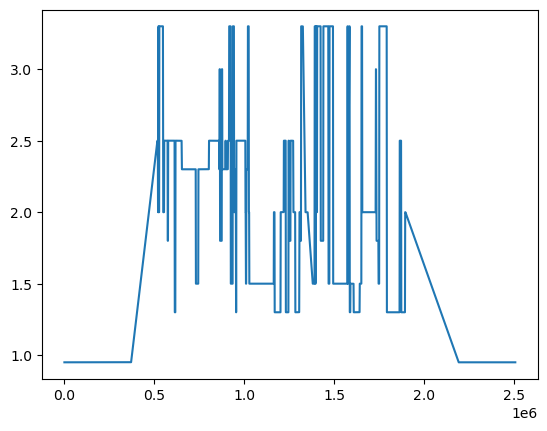

In [ ]:
no_index['annotation'].plot()

In [ ]:
np.load()

,x,y,z,annotation


# WildPPG

In [ ]:
datadir="C:/Users/cleme/ETH/Master/Thesis/data/euler/wildppg_preprocessed/"
file_path = datadir + "WildPPG_Part_an0.npz"
data = np.load(file_path)

In [ ]:
datadir="C:/Users/cleme/ETH/Master/Thesis/data/euler/wildppg_preprocessed/WildPPG.mat"
data = loadmat(datadir)


In [ ]:
data['data_imu_wrist'][0,0].shape

In [ ]:
arr = np.array([[1,2,3,4]]).T
print(arr.shape)
np.repeat(arr, 4,axis=1).shape

In [ ]:
activity = data['data_imu_wrist'][0,0]
pd.Series(activity.squeeze()).plot()

In [ ]:
hr = data['data_bpm_values'][i,0]
print(hr.shape)
pd.Series(hr.squeeze()).plot()

In [ ]:
for i in range(16):
    hr = data['data_bpm_values'][i,0]
    activity = data['data_imu_wrist'][i,0]
    ppg = data['data_ppg_wrist'][i, 0]
    print(hr.shape)
    print(activity.shape)
    print(ppg.shape)

In [ ]:
any(pd.Series(data['data_bpm_values'][0,0].astype(int).squeeze()).isna())

In [ ]:
data['data_ppg_wrist'][0][0].shape

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/WildPPG/data"
file_pat = datadir + "/WildPPG_Part_an0.mat"
data = loadmat(file_pat)

In [ ]:
data['sternum']

In [ ]:
ecg = data['sternum']['ecg'][0][0][0][0][2].squeeze()

In [ ]:
import neurokit2 as nk 
signals, info = nk.ecg_process(ecg, sampling_rate=128)

In [ ]:
ecg_time = ecg.shape[0] / 128
time_rpeaks = info['ECG_R_Peaks'] / 128
diffed = np.diff(time_rpeaks)
hr = 60 / diffed 
window_size = 128 * 8 
stride = 128 * 2 
ecg_time

In [ ]:
pd.Series(data['sternum']['ecg'][0][0][0][0][2].squeeze(0)[:1000]).plot()

In [ ]:
print(data['wrist']['ppg_g'][0][0][0]['v'][0].shape)
print(data['wrist']['ppg_r'][0][0][0]['v'][0].shape)
print(data['wrist']['ppg_ir'][0][0][0]['v'][0].shape)

In [ ]:
from pathlib import Path 
datadir = Path(datadir)
lengths = []
for path in datadir.glob('*.mat'):
    data = loadmat(path)
    lengths.append(data['wrist']['acc_x'][0][0][0][0][2].shape[1])
    del data

In [ ]:
lengths

In [ ]:
names = []
for path in datadir.glob("*.mat"):
    names.append(str(path).split("_")[-1][:3])
names

# IEEE Dataset

The IEEE Dataset does not contain any activity labels or acceleration data. 

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/euler/IEEEPPG/Training_data/Training_data"
data = loadmat(datadir + "/DATA_01_TYPE01.mat")
hr = loadmat(datadir + "/DATA_01_TYPE01_BPMtrace.mat")


In [ ]:
signal_files = Path(datadir).glob("*[12].mat")
bpm_files = Path(datadir).glob("*_BPMtrace.mat")

fs = 125  # sampling rate
window_duration = 8
overlap_duration = 6 

from numpy.lib.stride_tricks import sliding_window_view
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

def filter_butter(x, fs):
    f1 = 0.5
    f2 = 4
    Wn = [f1, f2]
    N = 4
    b, a = butter(N, Wn, btype="bandpass", fs=fs)
    filtered = filtfilt(b, a, x)
    # Normalize to range [0, 1]
    scaler = MinMaxScaler()
    filtered = scaler.fit_transform(filtered.reshape(-1, 1)).flatten()
    return filtered

def preprocess_signal(signal: np.ndarray):
    # create windows
    windows = sliding_window_view(signal, window_shape=window_duration * fs)[
        :: (window_duration - overlap_duration) * fs
    ]
    # downsample from 125Hz => 25Hz
    downsampled_windows = windows[:, ::5]

    return downsampled_windows

participant_signals = []
participant_bpms = []
for i,(signal_file, bpm_file) in enumerate(zip(signal_files, bpm_files)):

    signals = loadmat(signal_file)["sig"]
    bpm = loadmat(bpm_file)['BPM0']

    ppg1 = filter_butter(signals[1], fs)
    ppg2 = filter_butter(signals[2], fs)
    acc_x = filter_butter(signals[3], fs)
    acc_y = filter_butter(signals[4], fs)
    acc_z = filter_butter(signals[5], fs)

    avg_ppg = (ppg1 + ppg2) / 2
    acc = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    ppg = preprocess_signal(avg_ppg)[:, :, np.newaxis]  # add concatenation axis
    acc = preprocess_signal(acc)[:, :, np.newaxis]
    combined_signal = np.concatenate((ppg, acc), axis=-1)  # Shape (W, T, 2)

    signal_data = combined_signal[:-1]
    if len(signal_data) != len(bpm):
        print(
                f"bpm {len(bpm)}and signal_data {len(signal_data)} are not the same shape "
        )
        signal_data = combined_signal[:]         
      

    print(len(signal_data))
    print(len(bpm))
    assert len(signal_data) == len(bpm)

    participant_signals.append(signal_data)
    participant_bpms.append(bpm)


stacked_signals = np.stack(participant_signals, axis=0)
stacked_bpms = np.stack(participant_bpms, axis=0)

In [ ]:
data['sig'][0]

In [ ]:
hr['BPM0'].shape

In [ ]:
data['whole_dataset'][0][0]

# Chapman 

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/Chapman/"
data = loadmat(datadir + "chapman.mat")


In [ ]:
data['whole_data'][0][0].shape

In [ ]:
df = pd.DataFrame(data['whole_data'])
df[0].values[1].shape

In [ ]:
df = pd.DataFrame(data['whole_data'])[1].apply(lambda x: x[0][0])
plt.hist(df.values)
print(df.unique())